In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def read_pkl(filename):
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [4]:
directory = './training_ASCEND_Lunar/'

data_reference = read_pkl(directory+'evaluation_reference_policy.pkl')

data_random_mod = read_pkl(directory+'evaluation_random_policy.pkl')

data_ruled_mod = read_pkl(directory+'evaluation_rule_based_policy.pkl')

data_0001_avg_mod = read_pkl(directory+'evaluation_0.001_best_avg_model.pkl')

data_0001_max_mod = read_pkl(directory+'evaluation_0.001_best_max_model.pkl')

data_0001_final_mod = read_pkl(directory+'evaluation_0.001_final_model.pkl')

data_00001_avg_mod = read_pkl(directory+'evaluation_0.0001_best_avg_model.pkl')

data_00001_max_mod = read_pkl(directory+'evaluation_0.0001_best_max_model.pkl')

data_00001_final_mod = read_pkl(directory+'evaluation_0.0001_final_model.pkl')

data_0001_avg_back = read_pkl(directory+'backprop_evaluation_0.001_best_avg_model.pkl')

data_0001_max_back = read_pkl(directory+'backprop_evaluation_0.001_best_max_model.pkl')

data_0001_final_back = read_pkl(directory+'backprop_evaluation_0.001_final_model.pkl')

data_00001_avg_back = read_pkl(directory+'backprop_evaluation_0.0001_best_avg_model.pkl')

data_00001_max_back= read_pkl(directory+'backprop_evaluation_0.0001_best_max_model.pkl')

data_00001_final_back = read_pkl(directory+'backprop_evaluation_0.0001_final_model.pkl')

In [5]:
data = [data_random_mod, data_ruled_mod, 
            data_0001_avg_mod, data_0001_max_mod, data_0001_final_mod,
            data_00001_avg_mod, data_00001_max_mod, data_00001_final_mod, 
            data_0001_avg_back, data_0001_max_back, data_0001_final_back,
            data_00001_avg_back, data_00001_max_back, data_00001_final_back]
labels = ['random', 'ruled based',
            'w/o backprop','','','','','',
            'w/ backprop','','','','','']
colors = ['black', 'steelblue',  
          'red', 'red','red', 'red', 'red','red',
          'lime', 'lime', 'lime', 'lime', 'lime', 'lime']
colors2 = ['black', 'steelblue', 'goldenrod', 
          'forestgreen', 'deeppink','red',
          'lime', 'magenta','saddlebrown', 'olivedrab','salmon']

In [6]:
def plot_scatterplot(data, data_ref, labels, scale=None):
    %matplotlib notebook
    ax1 = data_ref.plot.scatter(x='benefit', y='cost', c='DarkBlue', label='reference')
    i=0
    for policy_data in data:
        policy_data.plot.scatter(x='benefit', y='cost', c=colors[i], label=labels[i], ax=ax1)
        i+=1
    ax1.legend(loc = 'lower right')
    if scale == 'log':
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.legend(loc = 'lower left')
    plt.show()

<IPython.core.display.Javascript object>


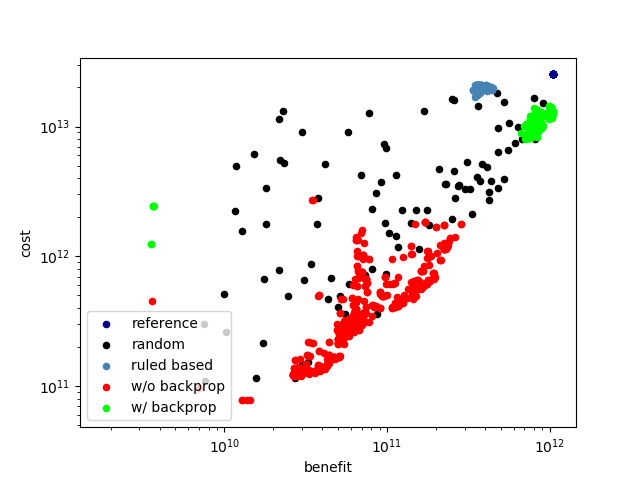

In [7]:
fig=plot_scatterplot(data, data_reference, labels, scale='log')

In [20]:
plt.savefig('2D_scatter_final.png', format='png', dpi=300)

<IPython.core.display.Javascript object>


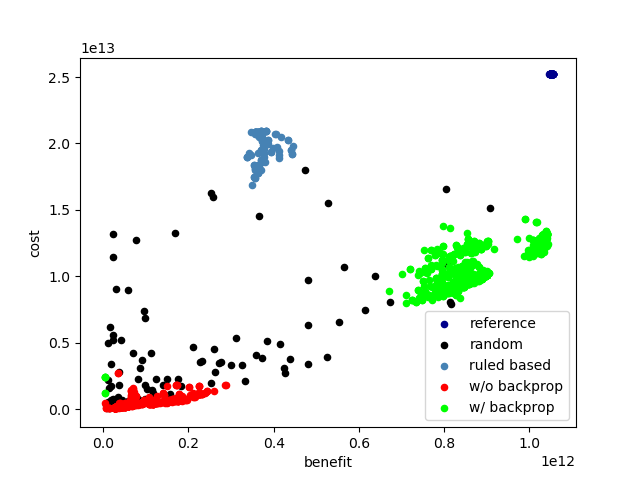

In [8]:
plot_scatterplot(data, data_reference, labels)

In [9]:
max_rb = 1
def plot_memory_and_rb(info_policy, n_run):
    %matplotlib inline
    memory=info_policy.iloc[n_run]['memory']
    rb_in=info_policy.iloc[n_run]['rb_in']
    rb_in_norm = [x / max_rb for x in rb_in]
    rb_out=info_policy.iloc[n_run]['rb_out']
    rb_out_norm = [x / max_rb for x in rb_out]
    time=range(len(memory))
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(time, memory, 'r--', label='memory')  # Plot some data on the axes.
    ax.plot(time, rb_in_norm, 'b--', label='Rb_in')  # Plot more data on the axes...
    ax.plot(time, rb_out_norm, 'g--', label='Rb_out')  # ... and some more.
    ax.set_xlabel('time step')  # Add an x-label to the axes.
    ax.set_ylabel('%')  # Add a y-label to the axes.
    ax.set_title('Mean reward for this policy: {}'.format(str(np.mean(info_policy['reward']))))  # Add a title.
    plt.ylim(0, 1) 
    ax.legend()  # Add a legend.
    
def plot_memory_and_rb2(info_policy, n_run):
    %matplotlib inline
    memory=info_policy.iloc[n_run]['memory']
    rb_in=info_policy.iloc[n_run]['rb_in']
    rb_in_norm = [x / max_rb for x in rb_in]
    rb_out=info_policy.iloc[n_run]['rb_out']
    rb_out_norm = [x / max_rb for x in rb_out]
    time=range(len(memory))
    fig, ax1 = plt.subplots(figsize=(10,7))
    ax2 = ax1.twinx()
    ax1.plot(time, memory, 'r--', label='memory')
    ax2.plot(time, 11*np.array(rb_in_norm), 'b--', label='11*Rb_in') 
    ax2.plot(time, rb_out_norm, 'g--', label='Rb_out') 
    ax2.set_yscale('log')
    ax1.set_xlabel('time step')  # Add an x-label to the axes.
    ax1.set_ylabel('Memory utilization')  # Add a y-label to the axes.
    ax2.set_ylabel('bps')  # Add a y-label to the axes.
    ax1.set_title('Mean reward for this policy: {}'.format(str(np.mean(info_policy['reward']))))  # Add a title.
    ax1.set_ylim(0, 1) 
    ax2.set_ylim(1e9/512, 10e9) 
    ax1.legend(loc=(.84,.94))  # Add a legend.
    ax2.legend(loc=(.84,.83))  # Add a legend.

def plot_memory_and_rb3(info_policy, n_run):
    neighbor_nodes = ['Mission26', 'Mission27', 'Mission28', 'Mission29', 'Mission30', 'Mission35',
                               'Mission37', 'Mission38', 'Mission39', 'Mission40', 'Mission44']
    %matplotlib inline
    memory=info_policy.iloc[n_run]['memory']
    rb_in=info_policy.iloc[n_run]['rb_in']
    rb_in_norm = [x / max_rb for x in rb_in]
    rb_out=info_policy.iloc[n_run]['rb_out']
    rb_out_norm = [x / max_rb for x in rb_out]
    memory_neighbors_dicts=info_policy.iloc[n_run]['memory_neighbors']
    time=range(len(memory))
    fig, ax1 = plt.subplots(figsize=(10,7))
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("axes", 1.1))
    ax1.plot(time, memory, 'r-', label='memory')
    ax2.plot(time, 11*np.array(rb_in_norm), 'b-', label='11*Rb_in') 
    ax2.plot(time, rb_out_norm, 'g-', label='Rb_out') 
    for node_id in neighbor_nodes:
        memory_node_i = []
        for memory_neighbors_dict in memory_neighbors_dicts:
            memory_node_i.append(memory_neighbors_dict[node_id])
        ax3.plot(time, memory_node_i, linestyle='dashed', color=colors2[neighbor_nodes.index(node_id)], label=node_id) 
    ax3.set_yscale('log')
    ax2.set_yscale('log')
    ax1.set_xlabel('time step')  # Add an x-label to the axes.
    ax1.set_ylabel('Memory utilization')  # Add a y-label to the axes.
    ax2.set_ylabel('bps')  # Add a y-label to the axes.
    ax3.set_ylabel('bits') 
    ax1.set_title('Mean reward for this policy: {}'.format(str(np.mean(info_policy['reward']))))  # Add a title.
    ax1.set_ylim(0, 1) 
    ax2.set_ylim(1e9/512, 10e9) 
    ax1.legend(loc=(1.2,.94))  # Add a legend.
    ax2.legend(loc=(1.2,.83))  # Add a legend.
    ax3.legend(loc=(1.2,.37))  # Add a legend.

In [10]:
from IPython.display import display
from ipywidgets import interactive

columns=[i for i in range(100)]

def k(run_number):
    plot_memory_and_rb3(data_00001_final_back, run_number)
    #plot_memory_and_rb3(data_reference_all, run_number)

interactive_plot = interactive(k, run_number=columns)
interactive_plot

interactive(children=(Dropdown(description='run_number', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…